# 使用手寫辨識資料集, 觀察 PCA 算法

# [教學目標]
- 以 PCA + 邏輯斯迴歸判斷手寫辨識資料集, 觀察不同 component 下正確率的變化
- 因為非監督模型的效果, 較難以簡單的範例看出來  
  所以非監督偶數日提供的範例與作業, 主要目的在於觀察非監督模型的效果,  
  同學只要能感受到模型效果即可, 不用執著於搞懂程式的每一個部分

# [範例重點]
- 以手寫辨識資料集, 觀察 PCA 算法取不同 component 時, PCA 解釋度與分類正確率如何變化 (In[5], Out[5])

In [1]:
# 載入套件
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

In [2]:
# 定義 PCA 與隨後的邏輯斯迴歸函數
logistic = SGDClassifier(loss='log', penalty='l2', max_iter=10000, tol=1e-5, random_state=0)
pca = PCA()
pipe = Pipeline(steps=[('pca', pca), ('logistic', logistic)])

# 載入手寫數字辨識集
digits = datasets.load_digits()
X_digits = digits.data
y_digits = digits.target

In [3]:
X_digits.shape

(1797, 64)

In [5]:
for i in np.logspace(-4, 4, 5):
    print(i)

0.0001
0.01
1.0
100.0
10000.0


In [6]:
np.logspace(-4, 4, 5)

array([1.e-04, 1.e-02, 1.e+00, 1.e+02, 1.e+04])

In [7]:
# 先執行 GridSearchCV 跑出最佳參數
param_grid = {
    'pca__n_components': [4, 10, 20, 30, 40, 50, 64],
    'logistic__alpha': np.logspace(-4, 4, 5),
}
search = GridSearchCV(pipe, param_grid, iid=False, cv=5, return_train_score=False)
search.fit(X_digits, y_digits)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

Best parameter (CV score=0.918):
{'logistic__alpha': 1.0, 'pca__n_components': 30}


In [26]:
results.groupby(components_col).apply(lambda g: g.nlargest(1, 'mean_test_score'))

,,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logistic__alpha,param_pca__n_components,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
param_pca__n_components,,,,,,,,,,,,,,,,
4,14,0.558454,0.100989,0.000600,4.895127e-04,1,4,"{'logistic__alpha': 1.0, 'pca__n_components': 4}",0.692308,0.671271,0.707521,0.747899,0.656338,0.695067,0.031686,19
10,8,0.062033,0.006658,0.000798,3.990184e-04,0.01,10,"{'logistic__alpha': 0.01, 'pca__n_components':...",0.898352,0.850829,0.888579,0.910364,0.842254,0.878075,0.026794,16
20,9,0.072007,0.011059,0.000998,7.008046e-07,0.01,20,"{'logistic__alpha': 0.01, 'pca__n_components':...",0.923077,0.872928,0.919220,0.941176,0.876056,0.906492,0.027177,13
30,17,0.917403,0.070283,0.000998,1.669611e-06,1,30,"{'logistic__alpha': 1.0, 'pca__n_components': 30}",0.942308,0.889503,0.924791,0.957983,0.873239,0.917565,0.031781,1
40,18,1.044369,0.112628,0.000592,4.837716e-04,1,40,"{'logistic__alpha': 1.0, 'pca__n_components': 40}",0.939560,0.886740,0.922006,0.960784,0.876056,0.917029,0.031759,2
50,12,0.116486,0.009494,0.000399,4.892796e-04,0.01,50,"{'logistic__alpha': 0.01, 'pca__n_components':...",0.914835,0.895028,0.944290,0.949580,0.873239,0.915394,0.028968,5
64,13,0.118770,0.017970,0.001199,3.983206e-04,0.01,64,"{'logistic__alpha': 0.01, 'pca__n_components':...",0.923077,0.895028,0.947075,0.949580,0.864789,0.915910,0.032267,3


In [29]:
results.groupby(components_col).mean()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
param_pca__n_components,,,,,,,,,,,,
4,0.532997,0.241157,0.000678,0.000373,0.541758,0.477901,0.548189,0.555182,0.538592,0.532324,0.034627,23.4
10,0.250527,0.029638,0.000636,0.000519,0.691758,0.639227,0.685237,0.703641,0.651831,0.674339,0.026017,21.4
20,0.288108,0.030484,0.000917,0.000165,0.708791,0.661878,0.705850,0.730532,0.677183,0.696847,0.025979,19.4
30,0.324373,0.019523,0.000838,0.000258,0.715385,0.670166,0.716992,0.736134,0.676620,0.703059,0.027559,14.2
40,0.375930,0.030660,0.000915,0.000419,0.714835,0.668508,0.721448,0.734454,0.677183,0.703286,0.027767,13.6
50,0.431097,0.033407,0.000864,0.000253,0.705495,0.669613,0.721448,0.733894,0.680000,0.702090,0.026499,15.0
64,0.504953,0.052023,0.001118,0.000241,0.709890,0.673481,0.721448,0.733333,0.679437,0.703518,0.025608,14.0


In [31]:
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logistic__alpha,param_pca__n_components,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.253103,0.178749,0.000998,7.294206e-07,0.0001,4,"{'logistic__alpha': 0.0001, 'pca__n_components...",0.722527,0.596685,0.718663,0.719888,0.692958,0.690144,0.047936,20
1,0.116334,0.022586,0.000791,7.349937e-04,0.0001,10,"{'logistic__alpha': 0.0001, 'pca__n_components...",0.906593,0.837017,0.894150,0.901961,0.830986,0.874141,0.033070,17
2,0.103814,0.010598,0.000801,4.006190e-04,0.0001,20,"{'logistic__alpha': 0.0001, 'pca__n_components...",0.923077,0.864641,0.899721,0.952381,0.878873,0.903739,0.031315,14
3,0.108523,0.003467,0.000599,4.894741e-04,0.0001,30,"{'logistic__alpha': 0.0001, 'pca__n_components...",0.914835,0.872928,0.922006,0.960784,0.881690,0.910449,0.031373,11
4,0.111559,0.006159,0.000798,3.991609e-04,0.0001,40,"{'logistic__alpha': 0.0001, 'pca__n_components...",0.923077,0.867403,0.941504,0.949580,0.876056,0.911524,0.033720,10
5,0.131254,0.007258,0.000995,3.376465e-06,0.0001,50,"{'logistic__alpha': 0.0001, 'pca__n_components...",0.895604,0.870166,0.938719,0.946779,0.887324,0.907718,0.029865,12
6,0.121961,0.016026,0.001000,2.251762e-06,0.0001,64,"{'logistic__alpha': 0.0001, 'pca__n_components...",0.909341,0.889503,0.935933,0.943978,0.892958,0.914342,0.022108,9
7,1.554972,0.915644,0.000597,4.872000e-04,0.01,4,"{'logistic__alpha': 0.01, 'pca__n_components': 4}",0.725275,0.596685,0.729805,0.708683,0.684507,0.688991,0.048807,21
8,0.062033,0.006658,0.000798,3.990184e-04,0.01,10,"{'logistic__alpha': 0.01, 'pca__n_components':...",0.898352,0.850829,0.888579,0.910364,0.842254,0.878075,0.026794,16
9,0.072007,0.011059,0.000998,7.008046e-07,0.01,20,"{'logistic__alpha': 0.01, 'pca__n_components':...",0.923077,0.872928,0.919220,0.941176,0.876056,0.906492,0.027177,13


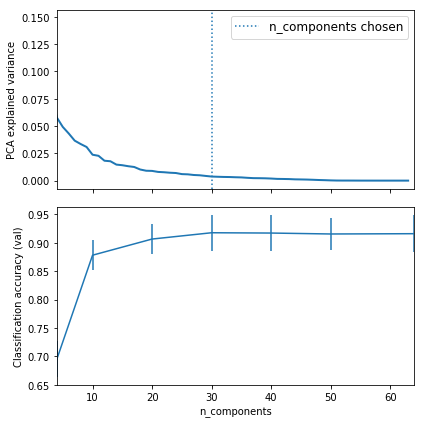

In [35]:
# 繪製不同 components 的 PCA 解釋度
pca.fit(X_digits)

fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(6, 6))
ax0.plot(pca.explained_variance_ratio_, linewidth=2)
ax0.set_ylabel('PCA explained variance')

ax0.axvline(search.best_estimator_.named_steps['pca'].n_components, linestyle=':', label='n_components chosen')
ax0.legend(prop=dict(size=12))

# 繪製不同採樣點的分類正確率
results = pd.DataFrame(search.cv_results_)
components_col = 'param_pca__n_components'
best_clfs = results.groupby(components_col).apply(lambda g: g.nlargest(1, 'mean_test_score'))

best_clfs.plot(x=components_col, y='mean_test_score', yerr='std_test_score', legend=False, ax=ax1)
ax1.set_ylabel('Classification accuracy (val)')
ax1.set_xlabel('n_components')
plt.tight_layout()
plt.show()

# 觀察結果
* explained variance ratio : 解釋變異性隨著 components 穩定下降
* 分類預測準確率 : 似乎也隨著 components 提升, 但是在 20 以後提升不多